Link to SageMaker video: https://youtu.be/eAKsOva_xhY


/tmp/ipython-input-1679051515.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['settlement_date'] = pd.to_datetime(df['settlement_date'])


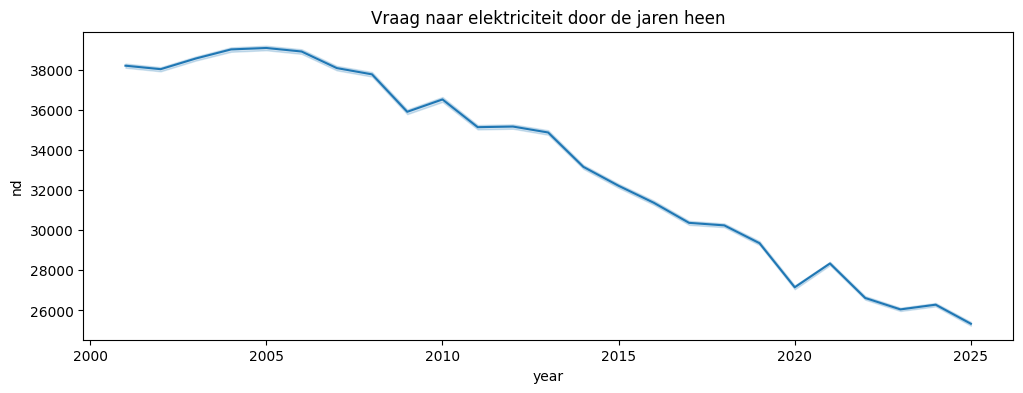

Cleaned data opgeslagen.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laad data
df = pd.read_csv('raw_combined_data.csv')

# 1. Kolommen opschonen
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 2. Datums
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df['year'] = df['settlement_date'].dt.year
df['month'] = df['settlement_date'].dt.month
df['day_of_week'] = df['settlement_date'].dt.weekday

# 3. NaNs en onzinnige data verwijderen
df_clean = df.dropna(subset=['nd']).copy()
df_clean = df_clean.fillna(0)

# 4. Plot
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_clean, x='year', y='nd')
plt.title('Vraag naar elektriciteit door de jaren heen')
plt.show()

# Opslaan
df_clean.to_csv('cleaned_electricity_data.csv', index=False)
print("Cleaned data opgeslagen.")